<center>
    <h1 style="color:red; font-weight:bold;">MRI Brain Tumor Detection Using CNN</h1>
    <h3> <span style="font-weight:bold;">Four Types of Brain Tumor(classes)</span><br>Glioma<br>Meningioma<br>No Tumor <br>     Pituitary
    </h3>

</center>

In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#---------------------------------------

import warnings
warnings.filterwarnings("ignore") 

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [ ]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [ ]:
tr_df = train_df('/kaggle/input/Training')

In [ ]:
tr_df

,Class Path,Class
0,/kaggle/input/Training/pituitary/Tr-pi_0532.jpg,pituitary
1,/kaggle/input/Training/pituitary/Tr-pi_0282.jpg,pituitary
2,/kaggle/input/Training/pituitary/Tr-pi_1401.jpg,pituitary
3,/kaggle/input/Training/pituitary/Tr-pi_0914.jpg,pituitary
4,/kaggle/input/Training/pituitary/Tr-pi_0691.jpg,pituitary
...,...,...
5707,/kaggle/input/Training/glioma/Tr-gl_0578.jpg,glioma
5708,/kaggle/input/Training/glioma/Tr-gl_0659.jpg,glioma
5709,/kaggle/input/Training/glioma/Tr-gl_0253.jpg,glioma
5710,/kaggle/input/Training/glioma/Tr-gl_0492.jpg,glioma


In [ ]:
ts_df = test_df('/kaggle/input/Testing')

In [ ]:
ts_df

,Class Path,Class
0,/kaggle/input/Testing/pituitary/Te-pi_0059.jpg,pituitary
1,/kaggle/input/Testing/pituitary/Te-pi_0024.jpg,pituitary
2,/kaggle/input/Testing/pituitary/Te-pi_0232.jpg,pituitary
3,/kaggle/input/Testing/pituitary/Te-pi_0286.jpg,pituitary
4,/kaggle/input/Testing/pituitary/Te-pi_0233.jpg,pituitary
...,...,...
1306,/kaggle/input/Testing/glioma/Te-gl_0107.jpg,glioma
1307,/kaggle/input/Testing/glioma/Te-gl_0288.jpg,glioma
1308,/kaggle/input/Testing/glioma/Te-gl_0108.jpg,glioma
1309,/kaggle/input/Testing/glioma/Te-glTr_0004.jpg,glioma


In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=40, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
661,/kaggle/input/Testing/notumor/Te-no_0350.jpg,notumor
494,/kaggle/input/Testing/notumor/Te-no_0061.jpg,notumor
688,/kaggle/input/Testing/notumor/Te-no_0114.jpg,notumor
837,/kaggle/input/Testing/meningioma/Te-me_0190.jpg,meningioma
1162,/kaggle/input/Testing/glioma/Te-gl_0136.jpg,glioma
...,...,...
146,/kaggle/input/Testing/pituitary/Te-pi_0224.jpg,pituitary
462,/kaggle/input/Testing/notumor/Te-noTr_0001.jpg,notumor
305,/kaggle/input/Testing/notumor/Te-no_0322.jpg,notumor
318,/kaggle/input/Testing/notumor/Te-no_0059.jpg,notumor


In [ ]:
ts_df

,Class Path,Class
159,/kaggle/input/Testing/pituitary/Te-pi_0131.jpg,pituitary
1059,/kaggle/input/Testing/glioma/Te-gl_0078.jpg,glioma
1119,/kaggle/input/Testing/glioma/Te-glTr_0003.jpg,glioma
1306,/kaggle/input/Testing/glioma/Te-gl_0107.jpg,glioma
1155,/kaggle/input/Testing/glioma/Te-gl_0289.jpg,glioma
...,...,...
1031,/kaggle/input/Testing/glioma/Te-gl_0117.jpg,glioma
707,/kaggle/input/Testing/meningioma/Te-me_0303.jpg,meningioma
703,/kaggle/input/Testing/notumor/Te-no_0018.jpg,notumor
916,/kaggle/input/Testing/meningioma/Te-me_0135.jpg,meningioma


In [ ]:
batch_size = 32
img_size = (299, 299)

_gen = ImageDataGenerator(rescale=1/255,
                          brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)


tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                  y_col='Class', batch_size=batch_size,
                                  target_size=img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col='Class', batch_size=batch_size,
                                     target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                  y_col='Class', batch_size=16,
                                  target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
img_shape=(299,299,3)
    
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D())   

model.add(Flatten())

model.add(Dense(512,activation = "relu"))
model.add(Dropout(rate=0.30))
model.add(Dense(128,activation = "relu"))
model.add(Dropout(rate=0.20))
model.add(Dense(32,activation = "relu"))
model.add(Dropout(rate=0.10))
model.add(Dense(4, activation="softmax"))

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy',
                        Precision(),
                        Recall()])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 299, 299, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 149, 149, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 74, 74, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 175232)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    89,719,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,882,468 (342.87 MB)

 Trainable params: 89,882,468 (342.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle= False)

Epoch 1/10
  1/179 ━━━━━━━━━━━━━━━━━━━━ 1:01:56 21s/step - accuracy: 0.3438 - loss: 1.3884 - precision: 0.0000e+00 - recall: 0.0000e+00

I0000 00:00:1714552330.912625     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714552330.933787     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.5410 - loss: 1.1991 - precision: 0.6590 - recall: 0.3374

W0000 00:00:1714552395.597639     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714552397.331615     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


179/179 ━━━━━━━━━━━━━━━━━━━━ 96s 421ms/step - accuracy: 0.5416 - loss: 1.1971 - precision: 0.6596 - recall: 0.3384 - val_accuracy: 0.7847 - val_loss: 0.5005 - val_precision: 0.8010 - val_recall: 0.7496
Epoch 2/10


W0000 00:00:1714552406.038204     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 197ms/step - accuracy: 0.8322 - loss: 0.4516 - precision: 0.8543 - recall: 0.7935 - val_accuracy: 0.8519 - val_loss: 0.3656 - val_precision: 0.8764 - val_recall: 0.8229
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 191ms/step - accuracy: 0.8886 - loss: 0.3028 - precision: 0.9016 - recall: 0.8715 - val_accuracy: 0.8885 - val_loss: 0.3018 - val_precision: 0.8955 - val_recall: 0.8763
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step - accuracy: 0.9256 - loss: 0.2204 - precision: 0.9341 - recall: 0.9142 - val_accuracy: 0.9099 - val_loss: 0.2245 - val_precision: 0.9146 - val_recall: 0.8992
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 190ms/step - accuracy: 0.9425 - loss: 0.1667 - precision: 0.9491 - recall: 0.9383 - val_accuracy: 0.9298 - val_loss: 0.1988 - val_precision: 0.9340 - val_recall: 0.9298
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 34s 190ms/step - accuracy: 0.9653 - loss: 0.1116 - precision: 0.9687 - recall: 0.9607 - val_accuracy: 0.9496 - val_loss

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

179/179 ━━━━━━━━━━━━━━━━━━━━ 36s 198ms/step - accuracy: 0.9985 - loss: 0.0071 - precision: 0.9985 - recall: 0.9985


W0000 00:00:1714554211.603172     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.9699 - loss: 0.1163 - precision: 0.9713 - recall: 0.9683
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.9585 - loss: 0.1620 - precision: 0.9586 - recall: 0.9585
Train Loss: 0.0082
Train Accuracy: 99.86%
--------------------
Validation Loss: 0.1229
Validation Accuracy: 96.34%
--------------------
Test Loss: 0.1255
Test Accuracy: 96.95%


In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

 5/41 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step 

W0000 00:00:1714554225.330544     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)


              precision    recall  f1-score   support

           0       0.99      0.94      0.96       150
           1       0.92      0.95      0.94       153
           2       0.97      1.00      0.99       203
           3       1.00      0.98      0.99       150

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



In [ ]:
import plotly.express as px

In [ ]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    label = list(class_dict.keys())
    plt.figure(figsize=(12, 12))
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    predictions = model.predict(img)
    print(predictions[0].argmax())
    probs = list(predictions[0])
    labels = label
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
#     plt.subplot(2, 1, 2)
#     bars = plt.barh(labels, probs)
#     plt.xlabel('Probability', fontsize=15)
#     ax = plt.gca()
#     ax.bar_label(bars, fmt = '%.2f')
    plt.show()
    fig = px.bar(x=probs, y=labels)
    fig.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
0


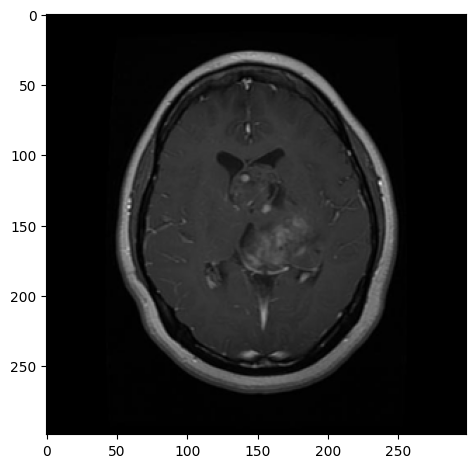

In [ ]:
predict('/kaggle/input/Testing/glioma/Te-gl_0049.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2


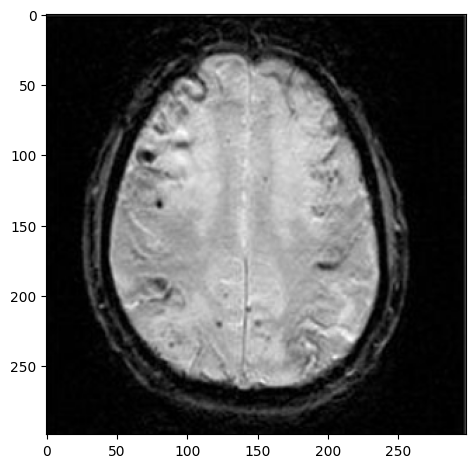

In [ ]:
predict("/kaggle/input/Testing/notumor/Te-noTr_0008.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3


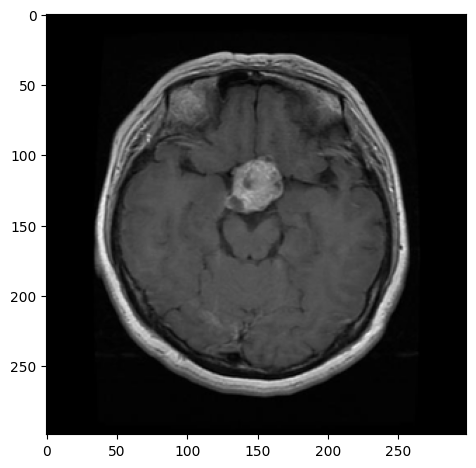

In [ ]:
predict("/kaggle/input/Testing/pituitary/Te-pi_0041.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1


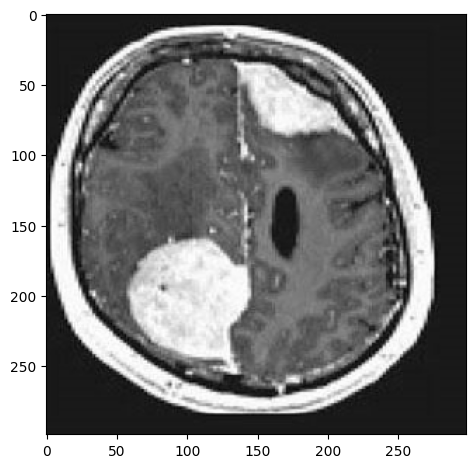

In [ ]:
predict("/kaggle/input/Testing/meningioma/Te-me_0074.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2


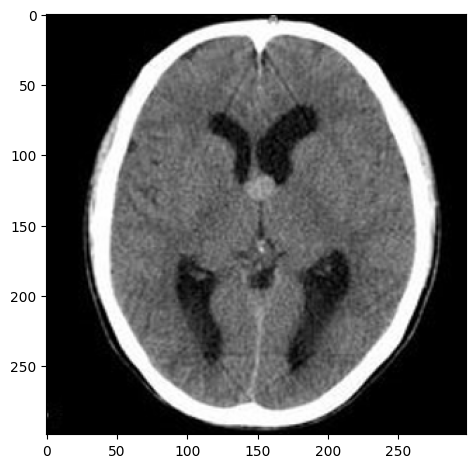

In [ ]:
predict("/kaggle/input/Testing/notumor/Te-no_0059.jpg")

In [ ]:
model.save("CNN_Model_1.keras")